
# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

## Import the library

In [1]:
import torch  # <Ctrl> / <Shift> + <Return>

## Getting help in Jupyter

In [2]:
torch.sq  # <Tab>

AttributeError: module 'torch' has no attribute 'sq'

In [ ]:
# What about all `*Tensor`s?
# Press <esc> to get out of help
torch.*Tensor?

In [3]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [9]:
# Annotate your functions / classes!
torch.nn.Module?

In [8]:
torch.nn.Module??

## Dropping to Bash: magic!

In [18]:
# List all the files in the current directory
!ls -lh  # or: %ls -lh

In [19]:
%%bash
# List all the files but with cleaner outputs for readability
for f in $(ls *.*); do
    echo $(wc -l $f)
done

In [20]:
%timeit range(100)

197 ns ± 29.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [21]:
# Getting some general help
%magic

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!

In [4]:
# Generate a tensor of size 2x3x4
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [5]:
# Get the size of the tensor
t.size()

torch.Size([2, 3, 4])

In [6]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [7]:
# prints dimensional space and sub-dimensions
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [8]:
t

tensor([[[0.0000e+00, 0.0000e+00, 2.6302e+20, 6.1949e-04],
         [1.0256e-08, 1.0313e-08, 3.1471e+12, 1.7340e-07],
         [1.0683e-05, 2.6660e-09, 1.2398e+16, 3.1369e+27]],

        [[1.6880e+25, 2.5226e-18, 3.4016e+21, 1.0791e-08],
         [5.4068e+22, 1.0488e-08, 1.6518e-04, 1.0414e-11],
         [1.3732e-05, 2.6586e+23, 8.1348e+20, 3.1369e+27]]])

In [9]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[2., 0., 3., 0.],
         [3., 5., 1., 0.],
         [8., 5., 8., 6.]],

        [[4., 9., 8., 3.],
         [0., 1., 2., 8.],
         [7., 1., 7., 0.]]])

In [10]:
t

tensor([[[2., 0., 3., 0.],
         [3., 5., 1., 0.],
         [8., 5., 8., 6.]],

        [[4., 9., 8., 3.],
         [0., 1., 2., 8.],
         [7., 1., 7., 0.]]])

In [11]:
# This resizes the tensor permanently 
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[2., 0., 3., 0., 3., 5., 1., 0.],
        [8., 5., 8., 6., 4., 9., 8., 3.],
        [0., 1., 2., 8., 7., 1., 7., 0.]])

In [12]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [14]:
# This *is* important, sigh...
s = r.clone()

In [15]:
# In-place fill of 1's
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [16]:
# Because we cloned r, even though we did an in-place operation, this doesn't affect r
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

## Vectors (1D Tensors)

In [17]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [18]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [19]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [20]:
t.size()

torch.Size([2, 3, 4])

In [21]:
w

tensor([1., 0., 2., 0.])

In [22]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [23]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [24]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [25]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [26]:
t@v

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [27]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([8., 1., 3., 0., 3.])

In [28]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 8.0, last: 3.0


In [29]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([1., 3.])

In [30]:
v

tensor([1., 2., 3., 4.])

In [100]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [102]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


## Matrices (2D Tensors)

In [31]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [32]:
m.dim()

2

In [33]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [34]:
# Returns the total number of elements, hence num-el (number of elements)
m.numel()

8

In [49]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [50]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [51]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [52]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [53]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [54]:
# Indexes row 0, all columns (returns size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [82]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [83]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [84]:
# Scalar product
m @ v

tensor([49., 47.])

In [90]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [91]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [92]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.9455, 5.8762, 3.7656, 7.0149],
        [4.8770, 2.0761, 1.9619, 9.0320]])

In [93]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.9923, 4.0825, 2.8331, 6.6689],
        [3.0179, 1.6613, 0.8157, 8.6820]])

In [94]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.1772, 2.8548, 0.9559, 3.1828],
        [1.6457, 0.3608, 0.5276, 7.4679]])

In [95]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 4.5151,  7.3896,  7.9807,  7.4152],
        [ 4.1857,  5.8405,  2.6779, 12.3526]])

In [96]:
m.size()

torch.Size([2, 4])

In [97]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [101]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [104]:
t + torch.rand(t.size())

tensor([[[1.6585, 4.3671, 4.3726, 4.2665],
         [2.9745, 5.4714, 1.6929, 7.6103],
         [9.8497, 3.8268, 6.5903, 3.5288]],

        [[3.8514, 3.0039, 0.8221, 7.4756],
         [9.6310, 7.5111, 2.0573, 4.4919],
         [8.0527, 6.2970, 3.8072, 9.0266]]])

## Constructors

In [105]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [107]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -2)

tensor([ 5.7000,  3.7000,  1.7000, -0.3000])

In [108]:
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

In [109]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [110]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [111]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [112]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [113]:
# Set default plots
from res.plot_lib import set_default
from matplotlib import pyplot as plt
set_default()

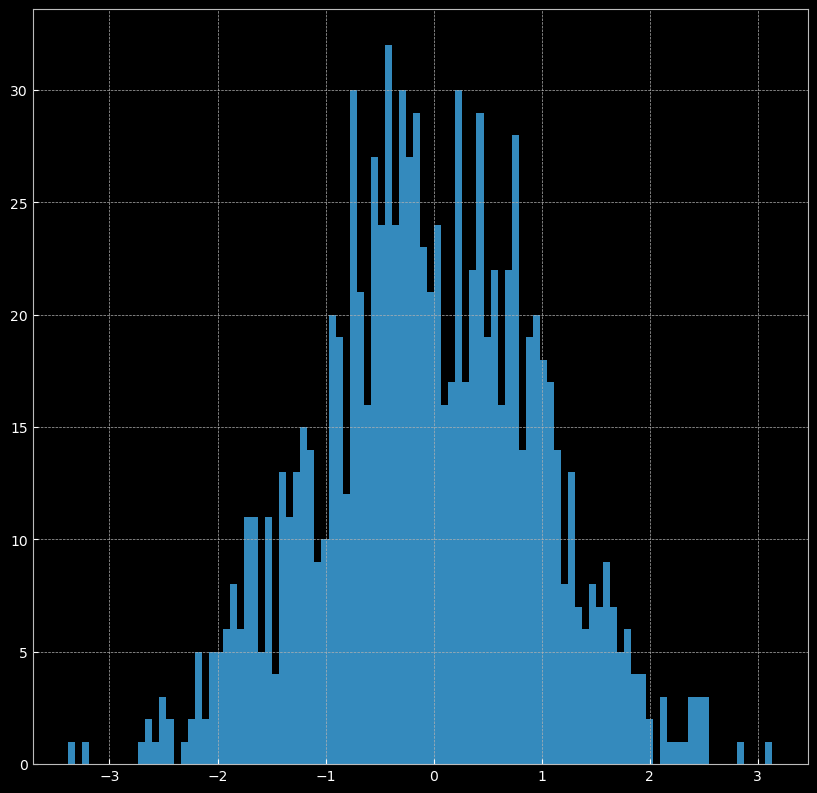

In [116]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

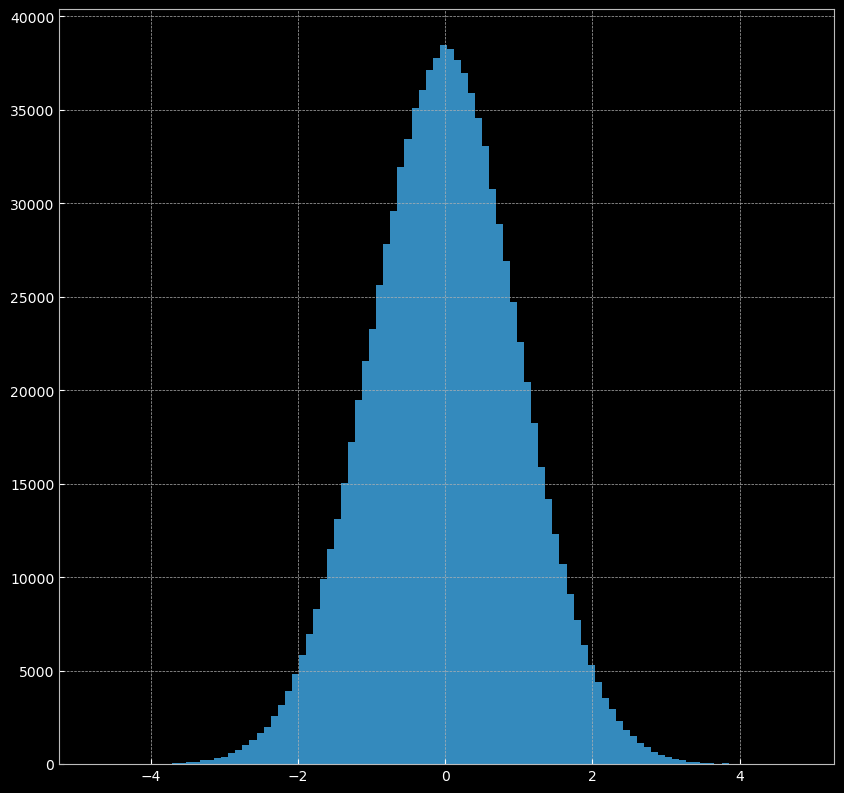

In [117]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

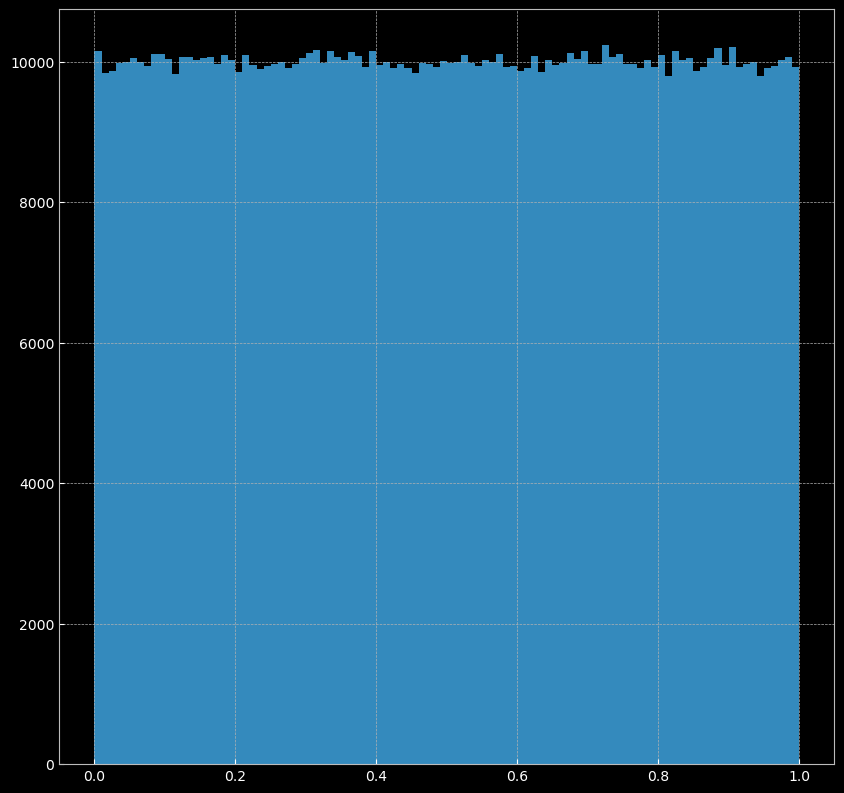

In [118]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting

In [119]:
# Helper to get what kind of tensor types
torch.*Tensor?

torch.BFloat16Tensor
torch.BoolTensor
torch.ByteTensor
torch.CharTensor
torch.DoubleTensor
torch.FloatTensor
torch.HalfTensor
torch.IntTensor
torch.LongTensor
torch.ShortTensor
torch.Tensor

In [120]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [121]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [122]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [124]:
# Move your tensor to GPU device 0 if there is one (first GPU in the system)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [125]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [126]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [127]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [128]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [129]:
# In-place multiplication of all elements by 2 for tensor n
# Because n is essentiall n_np, not a clone, this affects n_np
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [130]:
# Creates two tensor of size 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [133]:
a

tensor([[1., 2., 3., 4.]])

In [131]:
# Concatenate on axis 0, so you get 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [132]:
# Concatenate on axis 1, so you get 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](https://pytorch.org/docs/stable/index.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.